# Laboratorio 4: N-gramas

**Universidad del Valle de Guatemala**  
**Facultad de Ingeniería**  
**Departamento de Ciencias de la Computación**  
**Procesamiento de Lenguaje Natural**

## Integrantes

- Diego Leiva       -   21752
- Maria Ramirez     -   21342
- Pablo Orellana    -   21970

## Implementación de Modelo

### Librerías

In [1]:
import re
from collections import Counter
import math
import matplotlib.pyplot as plt
import pandas as pd

### Lectura del corpus

In [2]:
corpus = """
Cristiano Ronaldo forma parte de la leyenda del Real Madrid y siempre será recordado como uno de los grandes símbolos de su historia. 
Fue presentado en el Santiago Bernabéu el 6 de julio de 2009, acompañado por Eusebio y Alfredo Di Stéfano, y desde entonces no paró 
de marcar goles: 451 en 438 partidos oficiales con el Real Madrid (más de uno por encuentro). Además vio puerta en todas las 
competiciones: 312 en la Liga, 105 en la Champions, 22 en la Copa del Rey, 6 en el Mundial de Clubes, 4 en la Supercopa de España 
y 2 en la Supercopa de Europa.

Nadie en la historia del club ha marcado tantos goles como el delantero portugués, cuyo palmarés en el Real Madrid es impresionante: 
4 Champions League, 3 Mundiales de Clubes, 3 Supercopas de Europa, 2 Ligas, 2 Copas del Rey y 2 Supercopas de España. A ellos suma 
4 Balones de Oro, 3 Botas de Oro, 2 Premios The Best, 3 Premios al Mejor Jugador de la UEFA y 3 Trofeos Pichichi.

Trayectoria de récords
A lo largo de sus nueve temporadas como madridista, Cristiano dejó varios récords impresionantes: máximo goleador de la historia 
del club, máximo goleador de la historia de la Copa de Europa (marcó 105 tantos en Champions con nuestro equipo); máximo goleador 
madridista en la Liga (312); más partidos de tres o más goles en la historia de la Liga (34); y más tantos en una temporada con el 
Real Madrid (61).
"""

print("Cantidad de párrafos:", corpus.count('\n\n') + 1)

Cantidad de párrafos: 3


### Preprocesamiento y Tokenización

In [3]:
# Limpieza del texto
texto_limpio = re.sub(r'[^\w\s]', '', corpus.lower()) # Eliminar espacios en blanco
texto_limpio = re.sub(r'\s+', ' ', texto_limpio).strip() # Eliminar espacios en blanco adicionales
texto_limpio = re.sub(r'\d+', '', texto_limpio) # Eliminar números

# Tokenización simple
tokens = texto_limpio.split()

# Creacion de Unigramas y Bigrama
unigrams = tokens
bigrams = list(zip(tokens, tokens[1:]))

# Conteo de bigramas y unigramas
unigram_counts = Counter(tokens)
bigram_counts = Counter(bigrams)
vocabulario = set(tokens)

# Mostrar resultados
print(f"Conteos")
print(f"Unigramas: {len(unigram_counts)}")
print(f"Bigramas: {len(bigram_counts)}")
print("-" * 20)
print("Vocabulario")
print(f"Primeros 10 unigramas: {list(unigram_counts)[:10]}")  # Muestra los 10 primeros unigramas
print(f"Primeros 10 bigramas: {list(bigram_counts)[:10]}")  # Muestra los 10 primeros bigramas
print(f"Tamaño del vocabulario: {len(vocabulario)}")
print(f"Primeros 10 palabras del vocabulario: {list(vocabulario)[:10]}")

Conteos
Unigramas: 111
Bigramas: 180
--------------------
Vocabulario
Primeros 10 unigramas: ['cristiano', 'ronaldo', 'forma', 'parte', 'de', 'la', 'leyenda', 'del', 'real', 'madrid']
Primeros 10 bigramas: [('cristiano', 'ronaldo'), ('ronaldo', 'forma'), ('forma', 'parte'), ('parte', 'de'), ('de', 'la'), ('la', 'leyenda'), ('leyenda', 'del'), ('del', 'real'), ('real', 'madrid'), ('madrid', 'y')]
Tamaño del vocabulario: 111
Primeros 10 palabras del vocabulario: ['nadie', 'liga', 'goleador', 'forma', 'desde', 'equipo', 'santiago', 'delantero', 'suma', 'cuyo']


### Visualización de Frecuencias

In [4]:
# Obtener las 10 n-gramas más frecuentes
top_unigrams = unigram_counts.most_common(10)
top_bigrams = bigram_counts.most_common(10)

# Visualización de las frecuencias
def plot_frequencies(frequencies, title):
    """
    Genera un gráfico de barras para las frecuencias de n-gramas.
    
    Args:
        frequencies (list of tuples): Lista de tuplas con n-gramas y sus frecuencias.
        title (str): Título del gráfico.

    Returns:
        None
    """
    labels, values = zip(*frequencies)
    # Convertir bigramas a cadenas legibles
    labels = [' '.join(label) if isinstance(label, tuple) else label for label in labels]

    # Crear el gráfico
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color='blue')
    plt.title(title)
    plt.xlabel('N-gramas')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

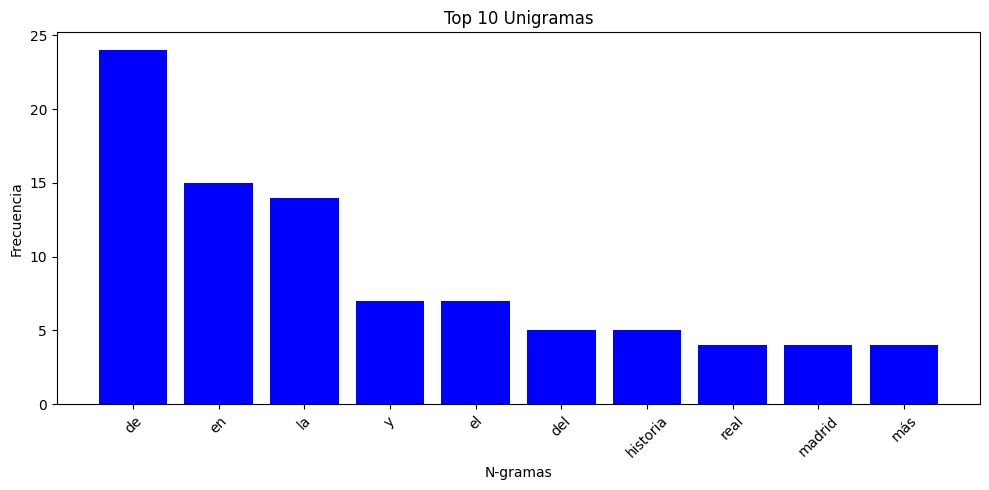

In [5]:
plot_frequencies(top_unigrams, 'Top 10 Unigramas')

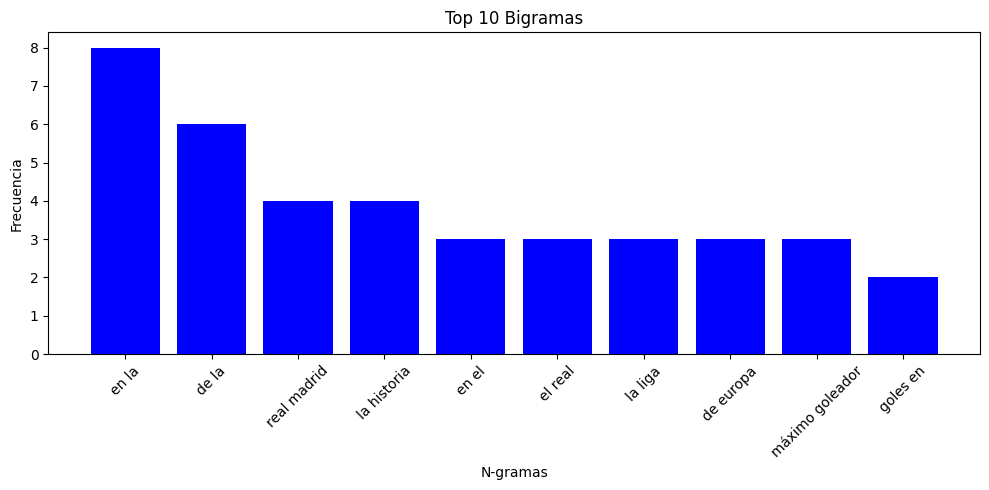

In [6]:
plot_frequencies(top_bigrams, 'Top 10 Bigramas')

### Cálculo de Entropía y Preplejidad sin Smoothing

In [7]:
# Entropía y perplejidad
def calcular_entropia(prob_list):
    """
    Calcula la entropía de una lista de probabilidades.
    Args:
        prob_list (list of float): Lista de probabilidades.
    Returns:
        float: Entropía calculada.
    """
    return -sum(math.log2(p) for p in prob_list) / len(prob_list)

def calcular_perplejidad(entropia):
    """
    Calcula la perplejidad a partir de la entropía.
    Args:
        entropia (float): Entropía.
    Returns:
        float: Perplejidad calculada.
    """
    return 2 ** entropia

In [8]:
frase = "cristiano ronaldo forma parte de la leyenda"
# Dividir la frase en tokens y calcular bigramas
tokens_frase = frase.lower().split()
bigrams_frase = list(zip(tokens_frase[:-1], tokens_frase[1:]))

probabilidades = [] # Lista para almacenar las probabilidades de los bigramas

# Calcular probabilidades de los bigramas en la frase
for bigrama in bigrams_frase:
    # Obtener la frecuencia del bigrama y del unigrama
    c_bigram = bigram_counts.get(bigrama, 0)
    c_unigram = unigram_counts.get(bigrama[0], 1)
    # Calcular la probabilidad del bigrama
    prob = c_bigram / c_unigram
    # Agregar la probabilidad a la lista
    probabilidades.append(prob)

# Calcular entropía y perplejidad
entropia = calcular_entropia(probabilidades)
perplejidad = calcular_perplejidad(entropia)

# resultados
print("Frase:", frase)
print("Bigrama de la frase:", bigrams_frase)
print("Probabilidades:", probabilidades)
print("Entropía (sin smoothing):", round(entropia, 4))
print("Perplejidad (sin smoothing):", round(perplejidad, 4))

Frase: cristiano ronaldo forma parte de la leyenda
Bigrama de la frase: [('cristiano', 'ronaldo'), ('ronaldo', 'forma'), ('forma', 'parte'), ('parte', 'de'), ('de', 'la'), ('la', 'leyenda')]
Probabilidades: [0.5, 1.0, 1.0, 1.0, 0.25, 0.07142857142857142]
Entropía (sin smoothing): 1.1346
Perplejidad (sin smoothing): 2.1955


### Técnicas de Smoothing Laplace y Add-K

In [9]:
V = len(vocabulario)  # Tamaño del vocabulario
k = 0.5    # Valor de k para Add-K smoothing

#### Funciones de probabilidad con smoothing

In [10]:
def laplace_probability(w1, w2):
    """
    Calcula la probabilidad Laplace para el bigrama (w1, w2)
    Args:
        w1 (str): Primera palabra del bigrama.
        w2 (str): Segunda palabra del bigrama.
    Returns:
        float: Probabilidad Laplace del bigrama (w1, w2).
    """
    return (bigram_counts.get((w1, w2), 0) + 1) / (unigram_counts.get(w1, 0) + V)

def add_k_probability(w1, w2, k=0.5):
    """
    Calcula la probabilidad Add-k para el bigrama (w1, w2)
    Args:
        w1 (str): Primera palabra del bigrama.
        w2 (str): Segunda palabra del bigrama.
        k (float): Constante de suavizado (default es 0.5).
    Returns:
        float: Probabilidad Add-k del bigrama (w1, w2).
    """
    return (bigram_counts.get((w1, w2), 0) + k) / (unigram_counts.get(w1, 0) + k * V)

#### Cálculo de probabilidades con smoothing

In [11]:
# Inicializar listas para almacenar las probabilidades con smoothing
prob_laplace = []
prob_add_k = []

# Calcular probabilidades con Laplace y Add-K smoothing
# para cada bigrama en la frase
for bigrama in bigrams_frase:
    # Calcular las probabilidades con Laplace y Add-K smoothing
    # Laplace smoothing: P(w2|w1) = (C(w1, w2) + 1) / (C(w1) + V)
    # Add-K smoothing: P(w2|w1) = (C(w1, w2) + k) / (C(w1) + k * V)
    laplace = laplace_probability(bigrama[0], bigrama[1])
    addk = add_k_probability(bigrama[0], bigrama[1], k)

    # Agregar las probabilidades a las listas
    prob_laplace.append(laplace)
    prob_add_k.append(addk)


# Entropía y Perplejidad Laplace
entropia_laplace = -sum(math.log2(p) for p in prob_laplace) / len(prob_laplace)
perplejidad_laplace = 2 ** entropia_laplace

# Entropía y Perplejidad Add-K
entropia_addk = -sum(math.log2(p) for p in prob_add_k) / len(prob_add_k)
perplejidad_addk = 2 ** entropia_addk

print("Entropía Laplace:", round(entropia_laplace, 4))
print("Perplejidad Laplace:", round(perplejidad_laplace, 4))
print("Entropía Add-K:", round(entropia_addk, 4))
print("Perplejidad Add-K:", round(perplejidad_addk, 4))

Entropía Laplace: 5.5796
Perplejidad Laplace: 47.8213
Entropía Add-K: 5.0188
Perplejidad Add-K: 32.419


### Tabla resumen: conteos y probabilidades

In [12]:
# Crear DataFrame con los bigramas de la frase
df = pd.DataFrame(bigrams_frase, columns=["P1", "P2"])

# Agregar columnas de conteo
df['Conteo Bigrama'] = df.apply(lambda row: bigram_counts.get((row['P1'], row['P2']), 0), axis=1)
df['Conteo Unigrama'] = df['P1'].apply(lambda w: unigram_counts.get(w, 0))

# Agregar columnas de probabilidades
df['Probabilidad Laplace'] = df.apply(lambda row: round(laplace_probability(row['P1'], row['P2']), 6), axis=1)
df['Probabilidad Add-K'] = df.apply(lambda row: round(add_k_probability(row['P1'], row['P2'], k=0.5), 6), axis=1)

# Mostrar la tabla
display(df)

,P1,P2,Conteo Bigrama,Conteo Unigrama,Probabilidad Laplace,Probabilidad Add-K
0,cristiano,ronaldo,1,2,0.017699,0.026087
1,ronaldo,forma,1,1,0.017857,0.026549
2,forma,parte,1,1,0.017857,0.026549
3,parte,de,1,1,0.017857,0.026549
4,de,la,6,24,0.051852,0.081761
5,la,leyenda,1,14,0.016000,0.021583


### Ejercicio Práctico

**Objetivo**    
Evaluar cómo un modelo de bigramas responde ante una frase con palabras o combinaciones poco frecuentes o no vistas en el corpus, utilizando Laplace y Add-K smoothing para evitar probabilidades cero.

**Instrucciones**   
Considerando la frase `"ronaldo juega con portugal"` realizar los siguientes pasos:
- Tokenizar la frase y generar sus bigramas.
   - Calcular las probabilidades de los bigramas usando:
     - Frecuencia directa (sin smoothing)
     - Laplace smoothing
     - Add-K smoothing (k = 0.5)
   - Calcular la entropía y perplejidad bajo cada técnica.
   - Comparar los resultados obtenidos.

**Preguntas clave**     
- ¿Cuál técnica produce menor perplejidad? ¿Por qué?
- ¿Qué sucede cuando un bigrama no aparece en el corpus original?

In [13]:
# Frase nueva para el ejercicio
frase_nueva = "cristiano ronaldo juega en portugal"
tokens_nueva = frase_nueva.lower().split()
bigrams_nueva = list(zip(tokens_nueva[:-1], tokens_nueva[1:]))

# Cálculo de probabilidades
prob_laplace_nueva = [laplace_probability(w1, w2) for w1, w2 in bigrams_nueva]
prob_addk_nueva = [add_k_probability(w1, w2, k=0.5) for w1, w2 in bigrams_nueva]
prob_nosmoothing = [bigram_counts.get((w1, w2), 0) / unigram_counts.get(w1, 1) for w1, w2 in bigrams_nueva]

if any(p == 0 for p in prob_nosmoothing):
    print("La frase contiene bigramas con probabilidad cero. No se puede calcular entropía y perplejidad sin smoothing.")
    ent_no = float('inf')
    per_no = float('inf')
else:
    ent_no = calcular_entropia(prob_nosmoothing)
    per_no = calcular_perplejidad(ent_no)

ent_lap = calcular_entropia(prob_laplace_nueva)
ent_addk = calcular_entropia(prob_addk_nueva)

# Mostrar resultados de entropía y perplejidad
print("Frase:", frase_nueva)
print(f"Sin smoothing → Entropía: {round(ent_no, 4)}, Perplejidad: {round(calcular_perplejidad(ent_no), 4)}")
print(f"Laplace       → Entropía: {round(ent_lap, 4)}, Perplejidad: {round(calcular_perplejidad(ent_lap), 4)}")
print(f"Add-K (k=0.5) → Entropía: {round(ent_addk, 4)}, Perplejidad: {round(calcular_perplejidad(ent_addk), 4)}")

# Mostrar en tabla
df_ejercicio = pd.DataFrame(bigrams_nueva, columns=["P1", "P2"])
df_ejercicio["Conteo Bigrama"] = df_ejercicio.apply(lambda row: bigram_counts.get((row["P1"], row["P2"]), 0), axis=1)
df_ejercicio["Conteo Unigrama"] = df_ejercicio["P1"].apply(lambda w: unigram_counts.get(w, 0))
df_ejercicio["Probabilidad sin smoothing"] = prob_nosmoothing
df_ejercicio["Probabilidad Laplace"] = [round(p, 6) for p in prob_laplace_nueva]
df_ejercicio["Probabilidad Add-K"] = [round(p, 6) for p in prob_addk_nueva]

display(df_ejercicio)

La frase contiene bigramas con probabilidad cero. No se puede calcular entropía y perplejidad sin smoothing.
Frase: cristiano ronaldo juega en portugal
Sin smoothing → Entropía: inf, Perplejidad: inf
Laplace       → Entropía: 6.5998, Perplejidad: 96.9929
Add-K (k=0.5) → Entropía: 6.5037, Perplejidad: 90.7401


,P1,P2,Conteo Bigrama,Conteo Unigrama,Probabilidad sin smoothing,Probabilidad Laplace,Probabilidad Add-K
0,cristiano,ronaldo,1,2,0.5,0.017699,0.026087
1,ronaldo,juega,0,1,0.0,0.008929,0.008850
2,juega,en,0,0,0.0,0.009009,0.009009
3,en,portugal,0,15,0.0,0.007937,0.007092
